## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [4]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [3]:
import numpy as np
from types import SimpleNamespace

# Stating the parameters
par = SimpleNamespace()
par.J = 3  # Number of career choices
par.N = 10  # Number of graduates
par.K = 10000  # Number of simulations

par.F = np.arange(1, par.N + 1)  # Array of friends count
par.sigma = 2  # Standard deviation of the noise term
par.v = np.array([1, 2, 3])  # Utility values for each career choice
par.c = 1  # Switching cost

# Simulating the utility values
utilities = np.zeros((par.K, par.J))  # Initialising utility matrix

# Generating utilities for each career choice across K simulations
for j in range(par.J):
    epsilon = np.random.normal(0, par.sigma, par.K)  # Noise term
    utilities[:, j] = par.v[j] + epsilon  # Utility calculation

# Calculating the expected utility for each career choice
expected_utilities = np.mean(utilities, axis=0)

# Calculating the average realised utility
average_realised_utilities = np.mean(utilities, axis=0)

# Results
print("Expected Utilities: ", expected_utilities)
print("Average Realised Utilities: ", average_realised_utilities)


Expected Utilities:  [0.99800119 2.0144744  3.0204696 ]
Average Realised Utilities:  [0.99800119 2.0144744  3.0204696 ]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

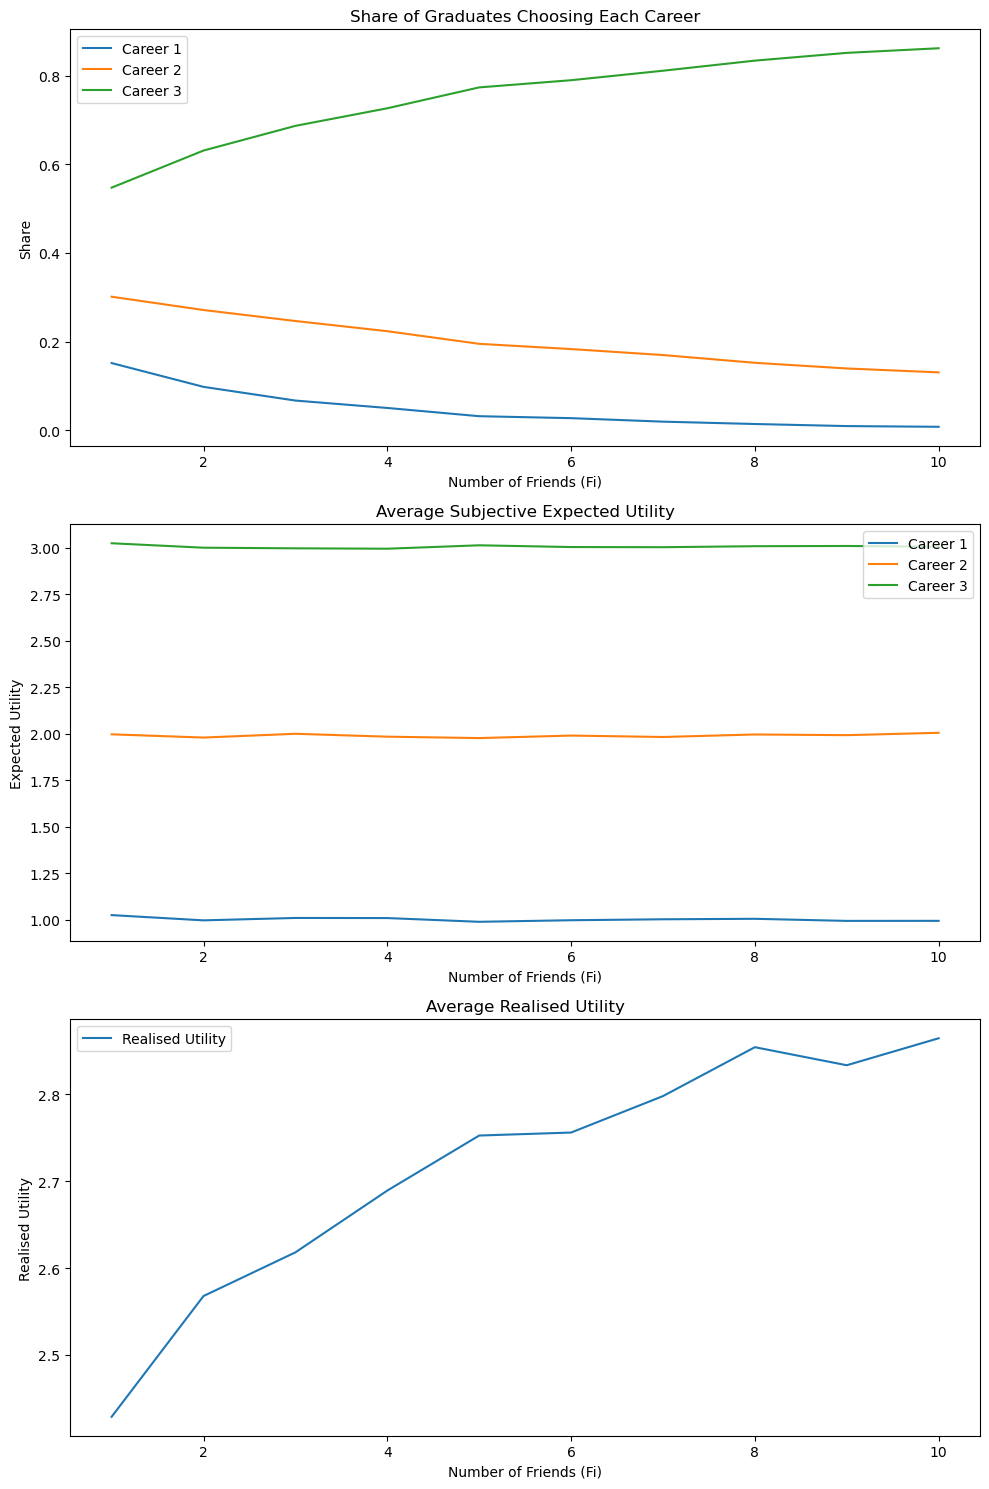

In [5]:
import matplotlib.pyplot as plt

# Initialising storage for results
chosen_careers = np.zeros((par.N, par.K), dtype=int)  # Chosen career for each graduate
prior_expectations = np.zeros((par.N, par.K, par.J))  # Prior expected utilities
realised_utilities = np.zeros((par.N, par.K))  # Realised utilities

# Simulation for each graduate
for i in range(par.N):
    Fi = i + 1  # Number of friends for the current graduate
    for k in range(par.K):
        # Simulate friends' utilities
        friends_utilities = np.zeros((Fi, par.J))
        for f in range(Fi):
            epsilon_f = np.random.normal(0, par.sigma, par.J)  # Noise term for friends
            friends_utilities[f, :] = par.v + epsilon_f  # Friends' utilities
        
        # Calculating prior expected utility
        prior_expectation = np.mean(friends_utilities, axis=0)
        prior_expectations[i, k, :] = prior_expectation
        
        # Drawing own noise terms
        epsilon_k = np.random.normal(0, par.sigma, par.J)  # Noise term for the graduate
        own_utilities = par.v + epsilon_k  # Graduate's utilities
        
        # Choosing the career with highest expected utility
        chosen_career = np.argmax(prior_expectation)
        chosen_careers[i, k] = chosen_career
        realised_utilities[i, k] = own_utilities[chosen_career]

# Calculating share of graduates choosing each career
career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        career_shares[i, j] = np.mean(chosen_careers[i, :] == j)

# Calculating average subjective expected utility and realised utility
avg_expected_utilities = np.mean(prior_expectations, axis=1)
avg_realised_utilities = np.mean(realised_utilities, axis=1)

# Visualising the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting share of graduates choosing each career
for j in range(par.J):
    axs[0].plot(par.F, career_shares[:, j], label=f'Career {j+1}')
axs[0].set_title('Share of Graduates Choosing Each Career')
axs[0].set_xlabel('Number of Friends (Fi)')
axs[0].set_ylabel('Share')
axs[0].legend()

# Plotting average subjective expected utility
for j in range(par.J):
    axs[1].plot(par.F, avg_expected_utilities[:, j], label=f'Career {j+1}')
axs[1].set_title('Average Subjective Expected Utility')
axs[1].set_xlabel('Number of Friends (Fi)')
axs[1].set_ylabel('Expected Utility')
axs[1].legend()

# Plotting average realised utility
axs[2].plot(par.F, avg_realised_utilities, label='Realised Utility')
axs[2].set_title('Average Realised Utility')
axs[2].set_xlabel('Number of Friends (Fi)')
axs[2].set_ylabel('Realised Utility')
axs[2].legend()

plt.tight_layout()
plt.show()


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

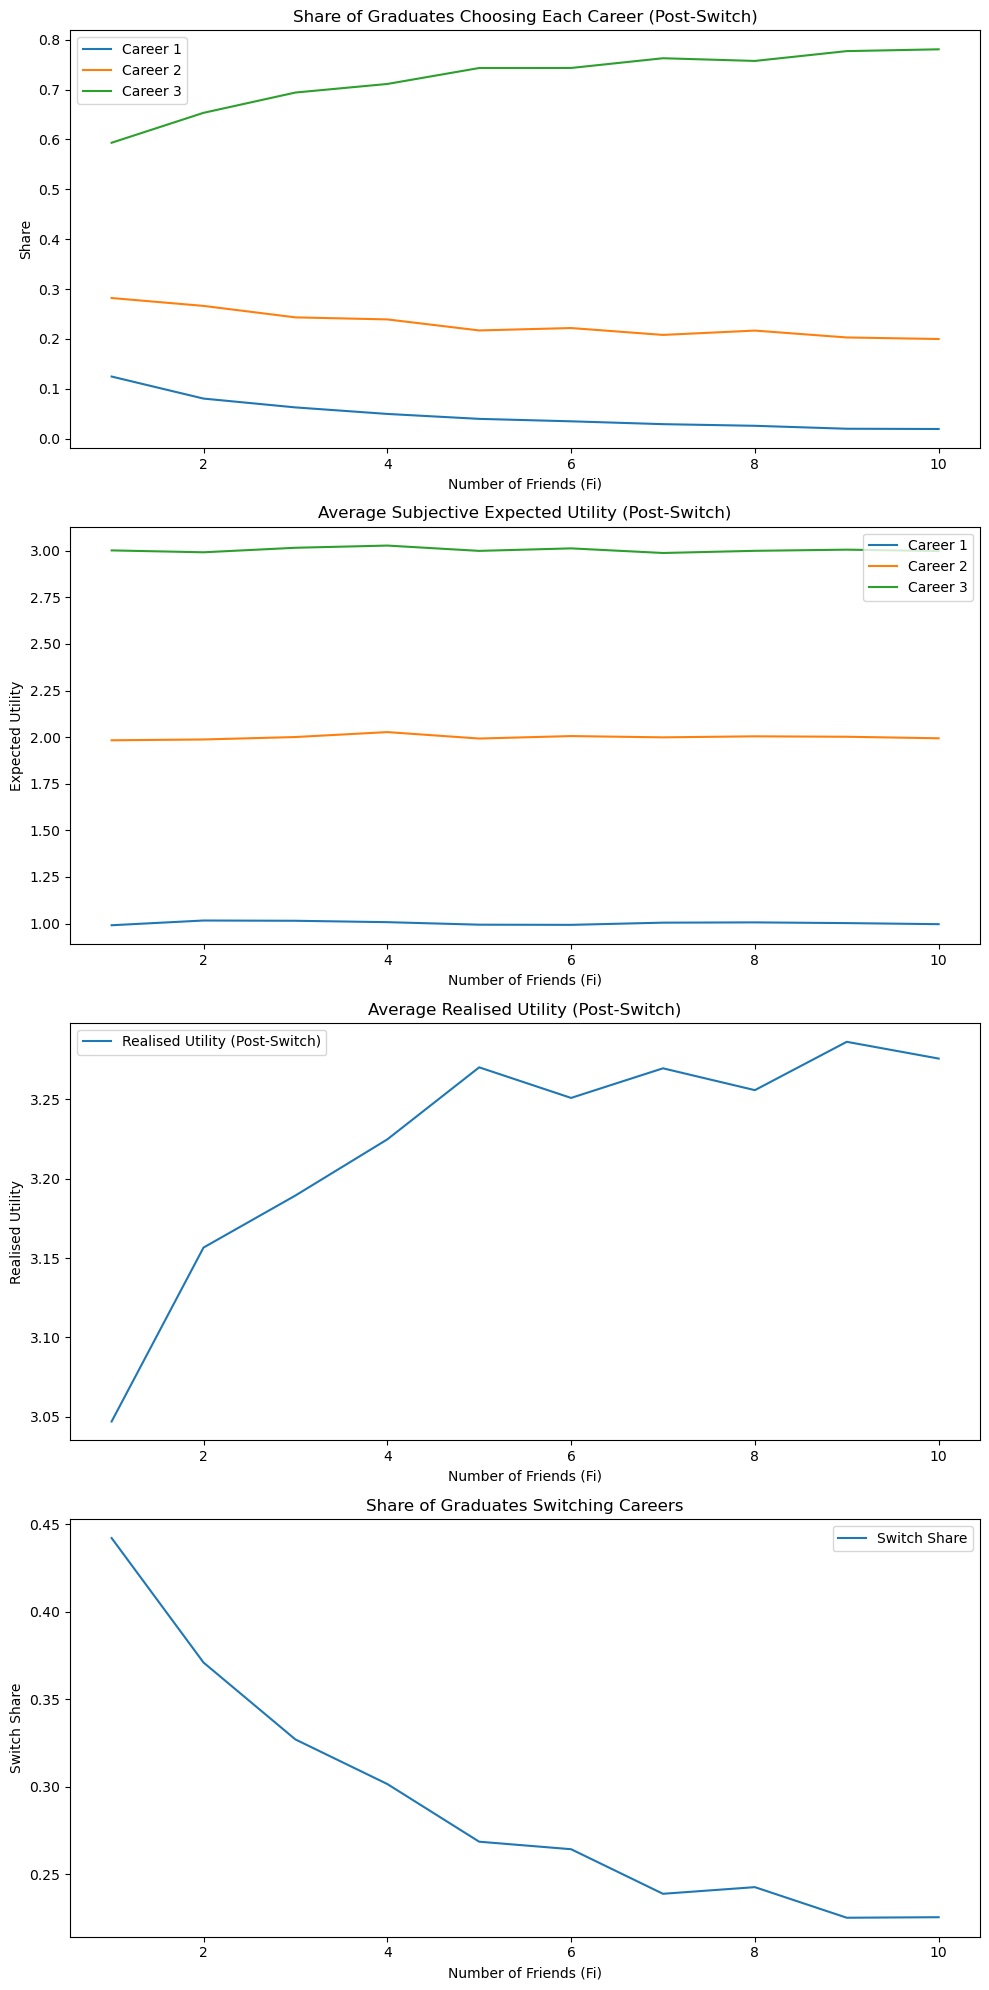

In [6]:
# Stating the parameters for switching cost scenario
c = 1  # Switching cost
new_prior_expectations = np.zeros((par.N, par.K, par.J))  # New prior expected utilities
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)  # New chosen careers
new_realised_utilities = np.zeros((par.N, par.K))  # New realised utilities

# Simulation for each graduate
for i in range(par.N):
    Fi = i + 1  # Number of friends for the current graduate
    for k in range(par.K):
        # Simulating friends' utilities
        friends_utilities = np.zeros((Fi, par.J))
        for f in range(Fi):
            epsilon_f = np.random.normal(0, par.sigma, par.J)  # Noise term for friends
            friends_utilities[f, :] = par.v + epsilon_f  # Friends' utilities
        
        # Calculating prior expected utility
        prior_expectation = np.mean(friends_utilities, axis=0)
        new_prior_expectations[i, k, :] = prior_expectation
        
        # Drawing own noise terms for remaining two careers
        epsilon_k = np.random.normal(0, par.sigma, par.J)  # Noise term for the graduate
        own_utilities = par.v + epsilon_k  # Graduate's utilities
        
        # Calculating utility with the switching cost
        current_career = chosen_careers[i, k]  # Previously chosen career
        switch_utilities = np.copy(prior_expectation)
        switch_utilities[current_career] = own_utilities[current_career]  # Keep current career utility
        for j in range(par.J):
            if j != current_career:
                switch_utilities[j] -= c  # Apply switching cost
        
        # Choosing new career with highest utility
        new_career = np.argmax(switch_utilities)
        new_chosen_careers[i, k] = new_career
        new_realised_utilities[i, k] = own_utilities[new_career]

# Calculating share of graduates choosing each career
new_career_shares = np.zeros((par.N, par.J))
for i in range(par.N):
    for j in range(par.J):
        new_career_shares[i, j] = np.mean(new_chosen_careers[i, :] == j)

# Calculating average subjective expected utility and realised utility
new_avg_expected_utilities = np.mean(new_prior_expectations, axis=1)
new_avg_realised_utilities = np.mean(new_realised_utilities, axis=1)

# Calculating the share of graduates that switch careers
switch_shares = np.zeros(par.N)
for i in range(par.N):
    switch_shares[i] = np.mean(new_chosen_careers[i, :] != chosen_careers[i, :])

# Visualising the results
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plotting share of graduates choosing each career (Post-Switch)
for j in range(par.J):
    axs[0].plot(par.F, new_career_shares[:, j], label=f'Career {j+1}')
axs[0].set_title('Share of Graduates Choosing Each Career (Post-Switch)')
axs[0].set_xlabel('Number of Friends (Fi)')
axs[0].set_ylabel('Share')
axs[0].legend()

# Plotting the average subjective expected utility (Post-Switch)
for j in range(par.J):
    axs[1].plot(par.F, new_avg_expected_utilities[:, j], label=f'Career {j+1}')
axs[1].set_title('Average Subjective Expected Utility (Post-Switch)')
axs[1].set_xlabel('Number of Friends (Fi)')
axs[1].set_ylabel('Expected Utility')
axs[1].legend()

# Plotting the average realised utility (Post-Switch)
axs[2].plot(par.F, new_avg_realised_utilities, label='Realised Utility (Post-Switch)')
axs[2].set_title('Average Realised Utility (Post-Switch)')
axs[2].set_xlabel('Number of Friends (Fi)')
axs[2].set_ylabel('Realised Utility')
axs[2].legend()

# Plotting the share of graduates switching careers
axs[3].plot(par.F, switch_shares, label='Switch Share')
axs[3].set_title('Share of Graduates Switching Careers')
axs[3].set_xlabel('Number of Friends (Fi)')
axs[3].set_ylabel('Switch Share')
axs[3].legend()

plt.tight_layout()
plt.show()
